In [28]:
#Geodesic clustering
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [29]:
XYZ_Edges = pd.read_csv('data\Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
5,1,25,0.458187,Undirected
6,1,58,0.344212,Undirected
7,2,8,0.196901,Undirected
8,2,15,0.337786,Undirected
9,2,22,0.631476,Undirected


In [30]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

In [31]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G.add_weighted_edges_from([(e)])

In [32]:
partition = community.best_partition(G) #partition是字典
size = float(len(set(partition.values())))
print(partition)
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 43.0
modularity: 0.936602482854839


Community 0
['1', '5', '14', '16', '17', '19', '25', '58', '92', '12', '13', '34', '36', '53', '90', '62', '66', '63', '57', '65', '93', '75', '87', '88', '134', '113', '110', '129', '83', '86', '115', '126', '98', '111', '116', '117', '127', '151', '150', '173', '143', '149', '156', '162', '152', '165', '180', '206', '214', '191', '212', '213', '228', '246', '254', '215', '222']
Community 1
['2', '22', '27', '41', '44', '59', '77', '84', '102', '28', '61', '64', '67', '108', '78', '40', '50', '69', '80', '85', '106', '112', '81', '97', '131', '144', '100', '109', '132', '155', '118', '133', '159', '120', '140', '147', '125', '138', '148', '164', '145', '153', '137', '141', '136', '157', '160', '142', '166', '175']
Community 2
['8', '9', '10', '24', '20', '46', '79', '31', '74', '43', '54', '73', '121', '89', '91', '95', '71', '105']
Community 3
['15', '3', '6', '18', '21', '26', '33', '35', '45', '56', '70', '23', '30']
Community 4
['4', '7', '11', '29', '32', '37', '49', '52', '68', 

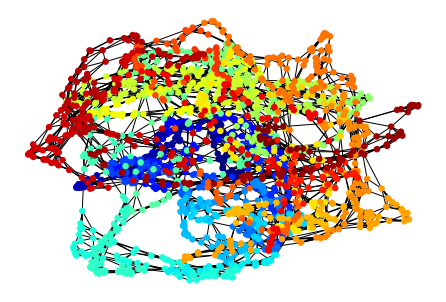

In [33]:
#assign node color based on community in network
for com in set(partition.values()) : #partition.value(第幾群)
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] #partition.key(節點)
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [37]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) : 
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
print(partition)
print(label, len(label))
labelRE = np.reshape(label, len(XYZ_C))

{'1': 0, '5': 0, '14': 0, '16': 0, '17': 0, '19': 0, '25': 0, '58': 0, '2': 1, '8': 2, '15': 3, '22': 1, '27': 1, '41': 1, '44': 1, '3': 3, '6': 3, '18': 3, '21': 3, '26': 3, '33': 3, '35': 3, '45': 3, '56': 3, '4': 4, '7': 4, '11': 4, '29': 4, '32': 4, '37': 4, '49': 4, '52': 4, '68': 4, '92': 0, '39': 4, '70': 3, '9': 2, '10': 2, '24': 2, '59': 1, '20': 2, '46': 2, '79': 2, '31': 2, '74': 2, '12': 0, '13': 0, '34': 0, '36': 0, '53': 0, '90': 0, '62': 0, '23': 3, '30': 3, '66': 0, '43': 2, '54': 2, '73': 2, '121': 2, '63': 0, '77': 1, '84': 1, '102': 1, '28': 1, '61': 1, '64': 1, '67': 1, '108': 1, '89': 2, '91': 2, '60': 4, '76': 4, '57': 0, '55': 4, '47': 4, '51': 4, '72': 4, '82': 4, '38': 4, '42': 4, '48': 4, '96': 4, '78': 1, '40': 1, '50': 1, '69': 1, '80': 1, '85': 1, '106': 1, '112': 1, '95': 2, '71': 2, '94': 4, '103': 4, '124': 4, '99': 4, '65': 0, '93': 0, '81': 1, '75': 0, '87': 0, '88': 0, '97': 1, '134': 0, '113': 0, '110': 0, '131': 1, '144': 1, '129': 0, '100': 1, '109

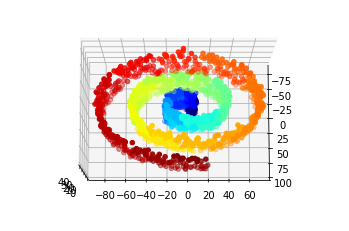

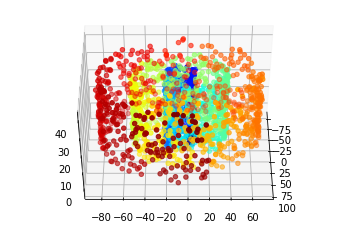

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)